# Task 4.9 - Part 2

## Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Defining path variable

In [2]:
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 4\04-2022 Instacart Basket Analysis"

## Importing dataframes

In [3]:
# importing dataframe
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

## Checking the imported dataframe

In [4]:
# checking the column names, data types and numbers of rows and columns
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 object  
 4   order_time_24h_format             object  
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

### Changing data types of relevant columns

In [5]:
# changing datatype to "int" from "str"
df_ords_prods_cust['order_time_24h_format'] = df_ords_prods_cust['order_time_24h_format'].astype('int')

In [6]:
# changing datatype to "int" from "str"
df_ords_prods_cust['order_day_of_week'] = df_ords_prods_cust['order_day_of_week'].astype('int')

### Correcting spelling mistakes in column names

In [7]:
# changing column name to number_of_dependents"
df_ords_prods_cust.rename(columns = {'number_of_dependatns' : 'number_of_dependents'}, inplace = True)

### Checking updated dataframe

In [8]:
# checking column names, datatypes, number of rows and columns
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 int32   
 4   order_time_24h_format             int32   
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

## Creating bar chart

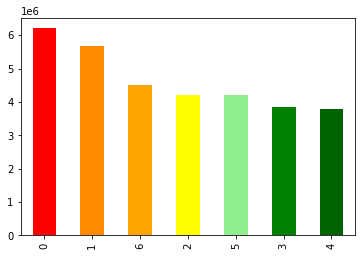

In [7]:
# creating a bar chart 
bar = df_ords_prods_cust['order_day_of_week'].value_counts(dropna = False).plot.bar(color = ['red', 'darkorange', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen'])

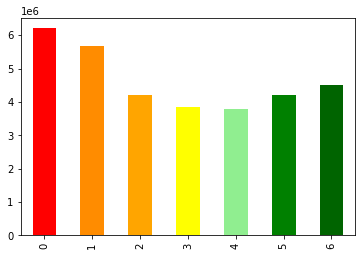

In [8]:
# creating bar chart while sorting by index
bar = df_ords_prods_cust['order_day_of_week'].value_counts(dropna = False).sort_index().plot.bar(color = ['red', 'darkorange', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen'])

## Creating Histograms

<AxesSubplot:ylabel='Frequency'>

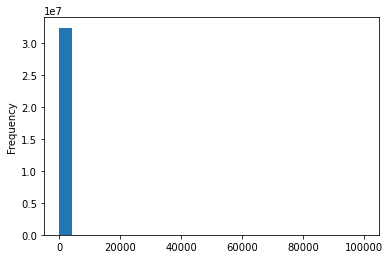

In [9]:
# creating histogram on "prices" column
df_ords_prods_cust['prices'].plot.hist(bins = 25)

###  Creating scatterplots to check for outliers

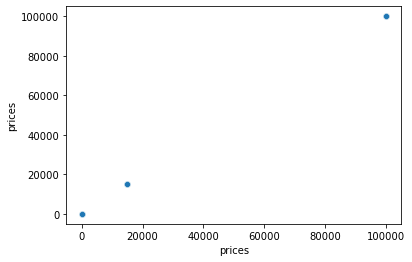

In [10]:
# creating scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',  data = df_ords_prods_cust)

### Descriptive analysis of "prices" column

In [11]:
# descriptive anaysis of "prices" column
df_ords_prods_cust['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
# maximum value of "prices" column
df_ords_prods_cust['prices'].max()

99999.0

### Replacing outliers with null values

In [13]:
# replacing outliers with null values
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] > 100, 'prices'] = np.nan

### Descriptive analysis of updated dataframe

In [14]:
# descriptive analysis of updated dataframe
df_ords_prods_cust['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Creating histogram with updated dataframe

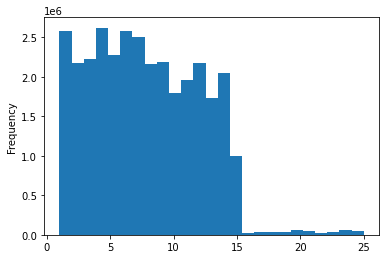

In [15]:
# creating histogram with updated dataframe
histogram = df_ords_prods_cust['prices'].plot.hist(bins = 25)

## Sampling data

In [9]:
# creating random numbers for a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [10]:
# splitting 70% of the dataframe with the list of random numbers
big = df_ords_prods_cust[dev]

In [11]:
# splitting 30% of the dataframe with the list of random numbers
small = df_ords_prods_cust[~dev]

#### Checking the split dataframes

In [19]:
# checking the number of rows in the "big" dataframe
len(big)

22683761

In [20]:
# checking the number of rows in the "small" dataframe
len(small)

9721098

In [21]:
# checking the number of rows in the original dataframe
len(df_ords_prods_cust)

32404859

### Creating a dataframe with only the required columns form the "small" dataframe

In [22]:
# creating a dataframe with only the required columns form the "small" dataframe
df_2 = small[['order_day_of_week', 'prices']]

## Creating a line plot with sample data

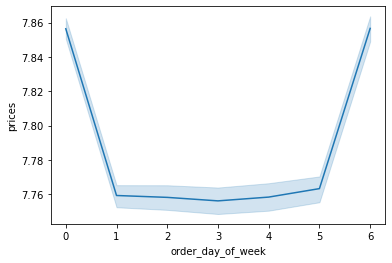

In [23]:
# creating line plot with sample data
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

## Histogram of "order_time_24h_format"

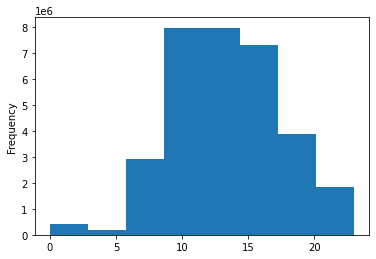

In [24]:
# histogram of "order_time_24h_format"
histogram_2 = df_ords_prods_cust['order_time_24h_format'].plot.hist(bins = 8)

#### The histogram displays that most of the orders come during the period of 10 am to 5 pm

## Bar chart for "loyalty_flag" column

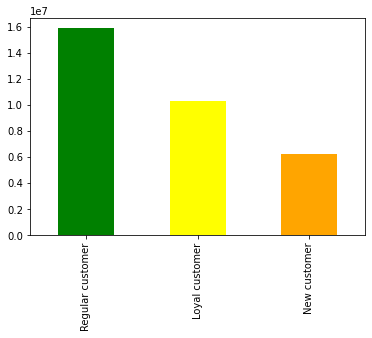

In [25]:
# bar chart of "loyalty_flag" column
bar_loyalty_flag = df_ords_prods_cust['loyalty_flag'].value_counts(dropna = False).plot.bar(color = ['green', 'yellow', 'orange'])

## Line chart of expenditure by hour of day

### Creating a dataframe with only the relevant columns from the sample dataframe

In [26]:
# creating dataframe using the relevant columns from the "small" dataframe
df_3 = small[['order_time_24h_format', 'prices']]

### Creating line chart

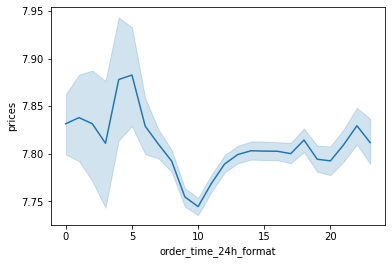

In [27]:
# line chart of expendture by hour of day
line_expenditure_by_hour = sns.lineplot(data = df_3, x = 'order_time_24h_format', y = 'prices')

## Line chart to find relationship with "age" and "number_of_dependents"

### Creating a dataframe with the relevant columns from the sample data

In [12]:
# creating a dataframe with the relevant columns from the sample data
df_4 = small[['age', 'number_of_dependents']]

### Creating a line chart

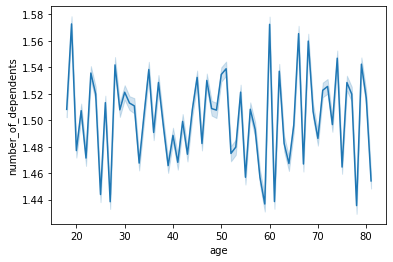

In [13]:
# creating line chart
line_age_number_of_dependents = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependents')

#### The line chart shows that there is no correlation between "age" and "number_of_dependents". Hence, no relation can be deletmined between "age" and "family_status" theough this visual.

## Scatterplot to find relationship between "age" and "income"

### Creating a dataframe with relevant columns from the sample data

In [16]:
# creating a dataframe with relevant columns from the sample data
df_5 = small[['age', 'income']]

### Creating a scatterplot

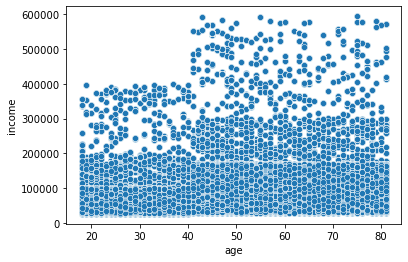

In [19]:
# creating a scatterplot with "age" and "prices" column
scatterplot_age_income = sns.scatterplot(data = df_5, x = 'age', y = 'income')

#### The scatterplot shows that there is no correlation between "age" and "income"

## Exporting the visualizations

In [29]:
# exporting visualizations in ".png" format
bar.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'bar_chart_1.png'))

In [30]:
# exporting visualizations in ".png" format
scatterplot.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'scatterplot_1.png'))

In [31]:
# exporting visualizations in ".png" format
histogram.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'histogram_1.png'))

In [32]:
# exporting visualizations in ".png" format
line.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'expenditure_by_day_of_week.png'))

In [33]:
# exporting visualizations in ".png" format
histogram_2.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'number_of_orders_by_hour.png'))

In [34]:
# exporting visualizations in ".png" format
bar_loyalty_flag.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'bar_chart_loyalty_flag.png'))

In [35]:
# exporting visualizations in ".png" format
line_expenditure_by_hour.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'line_chart_expenditure_by_hour.png'))

In [18]:
# exporting visualizations in ".png" format
line_age_number_of_dependents.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'line_chart_age_number_of_dependents.png'))

In [20]:
# exporting visualizations in ".png" format
scatterplot_age_income.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', 'scatterplot_age_income.png'))

## Exporting updated dataframe

In [21]:
# exporting updated dataframe
df_ords_prods_cust.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ords_prods_cust_merged_v2.pkl'))